<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Rappi_Analytics_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data 📚

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/orders (2022).csv')
data.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07T20:07:23Z,0
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07T20:12:14Z,1
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07T20:13:16Z,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125549 entries, 0 to 125548
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           125549 non-null  int64  
 1   store_id           125549 non-null  int64  
 2   to_user_distance   125549 non-null  float64
 3   to_user_elevation  125549 non-null  float64
 4   total_earning      125549 non-null  float64
 5   created_at         125549 non-null  object 
 6   taken              125549 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.7+ MB


In [ ]:
np.around(data.describe(),2)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,125549.00,1.255490e+05,125549.00,125549.00,125549.00,125549.00
mean,15078383.65,7.485716e+08,1.48,27.37,5374.31,0.92
std,475262.86,3.298381e+08,0.85,84.82,1784.92,0.27
min,14210727.00,3.000000e+07,0.00,-260.33,0.00,0.00
25%,14672553.00,9.000043e+08,0.81,-18.42,4200.00,1.00
50%,15093673.00,9.000077e+08,1.36,11.78,5200.00,1.00
75%,15475515.00,9.000127e+08,2.00,62.98,6400.00,1.00
max,15902524.00,9.000173e+08,9.36,975.23,108200.00,1.00


# 2.1 Exploration, Cleaning and Plotting Data 🕵

In [ ]:
#Looking for null values into the dataset
data.isnull().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
Month                0
Day                  0
Hour                 0
Dayweek              0
WeekDay              0
dtype: int64

In [ ]:
data.shape

(125549, 12)

In [ ]:
#Looking the minimum and maximum date
print(data['created_at'].min(),'\n',data['created_at'].max())

2017-09-05 00:01:02+00:00 
 2017-10-04 23:58:53+00:00


In [ ]:
data['to_user_distance'] = data['to_user_distance'].astype(int)

In [ ]:
#Create new columns from the "created_at" column
data['Month'] = data['created_at'].apply(lambda x:x.month).astype(int)
data['Day'] = data['created_at'].apply(lambda x:x.day).astype(int)
data['Hour'] = data['created_at'].apply(lambda x:x.hour).astype(int)
data['Dayweek'] = data['created_at'].apply(lambda x:x.weekday).astype(int)

In [ ]:
#Cast column into a datetime type
data['created_at'] = pd.to_datetime(data['created_at'])

In [ ]:
#Map day number with name being 0 Monday
data['WeekDay'] = data['Dayweek'].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",
                                       4:"Friday",5:"Saturday",6:"Sunday"})

In [ ]:
#Split dataframe into 2 taken and not taken
data_taken = data.query("taken==1")
data_notaken = data.query("taken==0")

## Insight N°1

## Fig.1

Almost total of orders registered was between 07:00 and 21:00 however the hours with most orders  were 12:00-13:59 and 19:00-20:59 of the days 1,10,17,24,26 and 30

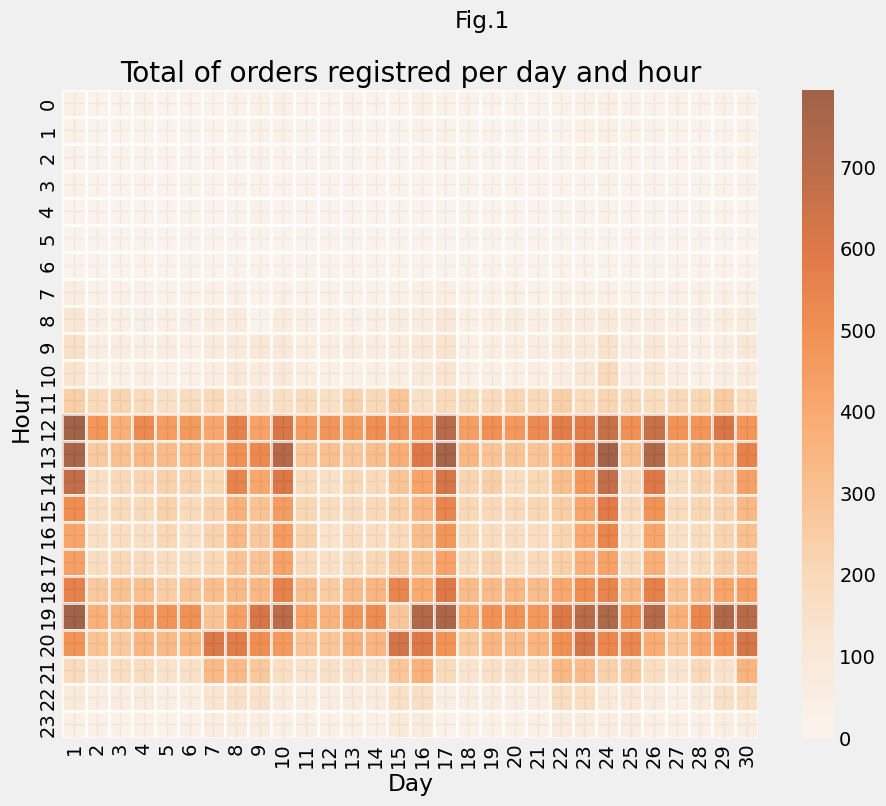

In [ ]:
#Q of orders by day and hour

pv_totalorders =data.pivot_table(index='Hour', columns='Day', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_totalorders,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=0.7)
plt.title("Total of orders registred per day and hour")
plt.suptitle("Fig.1")
plt.show()

## Insight N°2

## Fig.2

The week days with most orders registered were Sunday and Saturday in the hours said before, 12:00-13:59 and 19:00-20:59 but for Sunday all day was constant

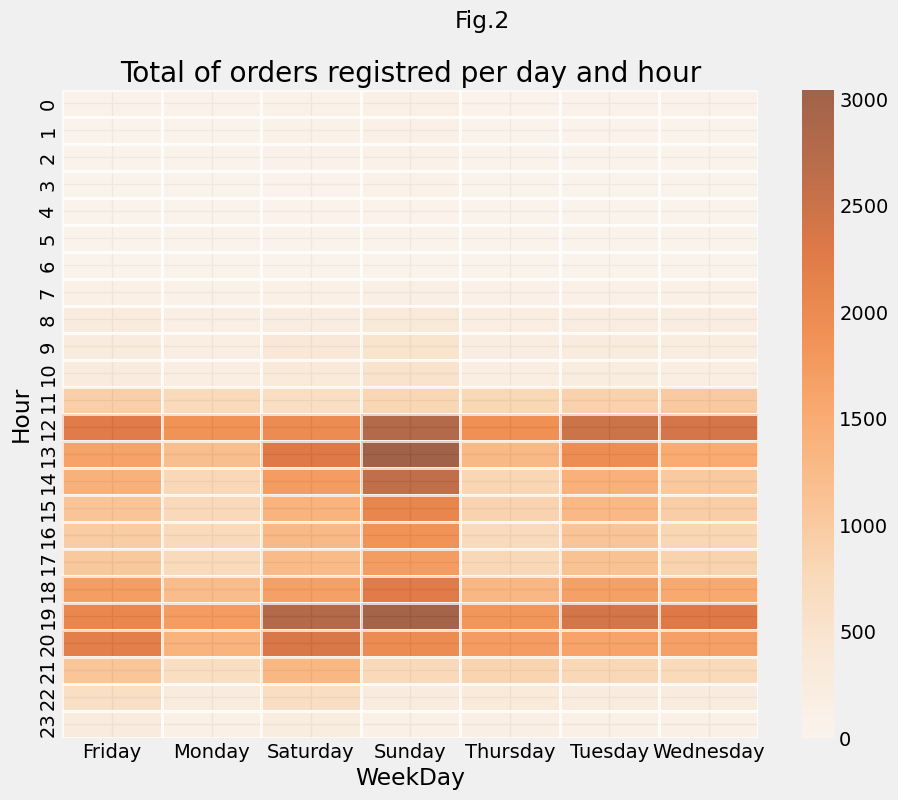

In [ ]:
#Q orders per weekday and hour

pv_weekday =data.pivot_table(index='Hour', columns='WeekDay', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_weekday,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=.7)
plt.title("Total of orders registred per day and hour")
plt.suptitle("Fig.2")
plt.show()

## Insight N°3

## Fig.3

I want to know if the most part of the orders not taken was due distance between the store and the client but that is not the case even couriers not taken order with only 1 meters of distance, however the orders were not taken on Saturday a day with a lot of orders

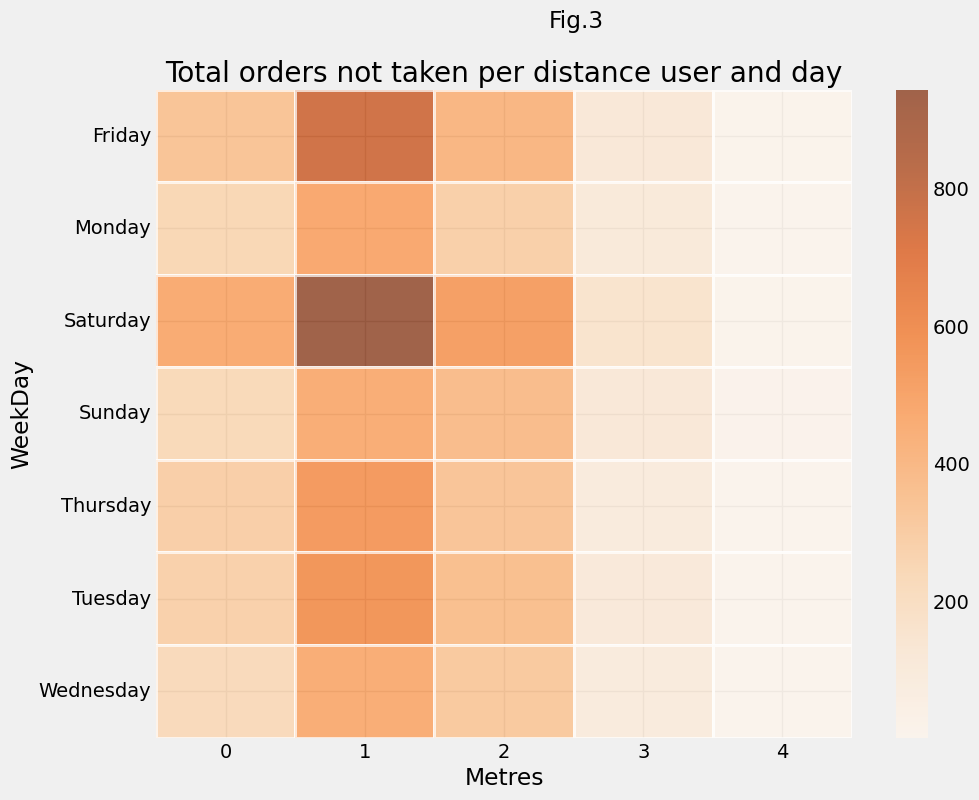

In [ ]:
#Q orders not taken per distance user and weekday

pv_distance =data_notaken.pivot_table(index='WeekDay', columns='to_user_distance', values='order_id', aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pv_distance,linewidths=2, linecolor='#FFFFFF', cmap='Oranges',alpha=.7)
plt.title("Total orders not taken per distance user and day")
plt.suptitle("Fig.3")
plt.xlabel("Metres")
plt.show()

## Insight N°4

## Fig.4

Let's continue with the orders taken and not taken, in the chart above found that of 100% of the orders registered **125549** , **9689** was not taken a **7.7%** and **115860** was taken **92.3%**

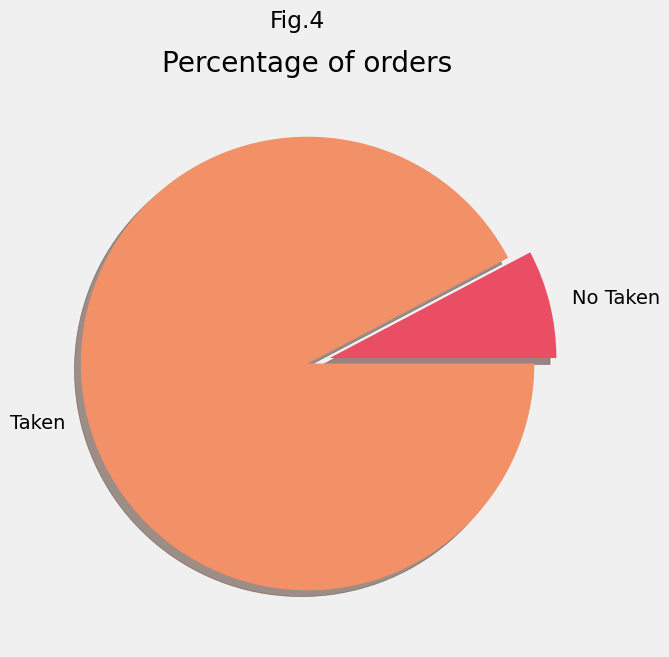

In [ ]:
#Percentage of orders taken

taken = data.groupby(['taken'])['order_id'].count()

colors =['#EA4E64','#F29068']
explode =[0.1,0]
labels =['No Taken','Taken']

plt.figure(figsize=(7,7))
plt.pie(taken.values,labels=labels, shadow=True,colors=colors, explode=explode)
plt.title('Percentage of orders')
plt.suptitle("Fig.4")
plt.show()

## Insight N°5

## Fig.5

If I was to see the process in one week and count the orders taken and not taken in percentage We will see that more of 90% of the orders were taken









  
    



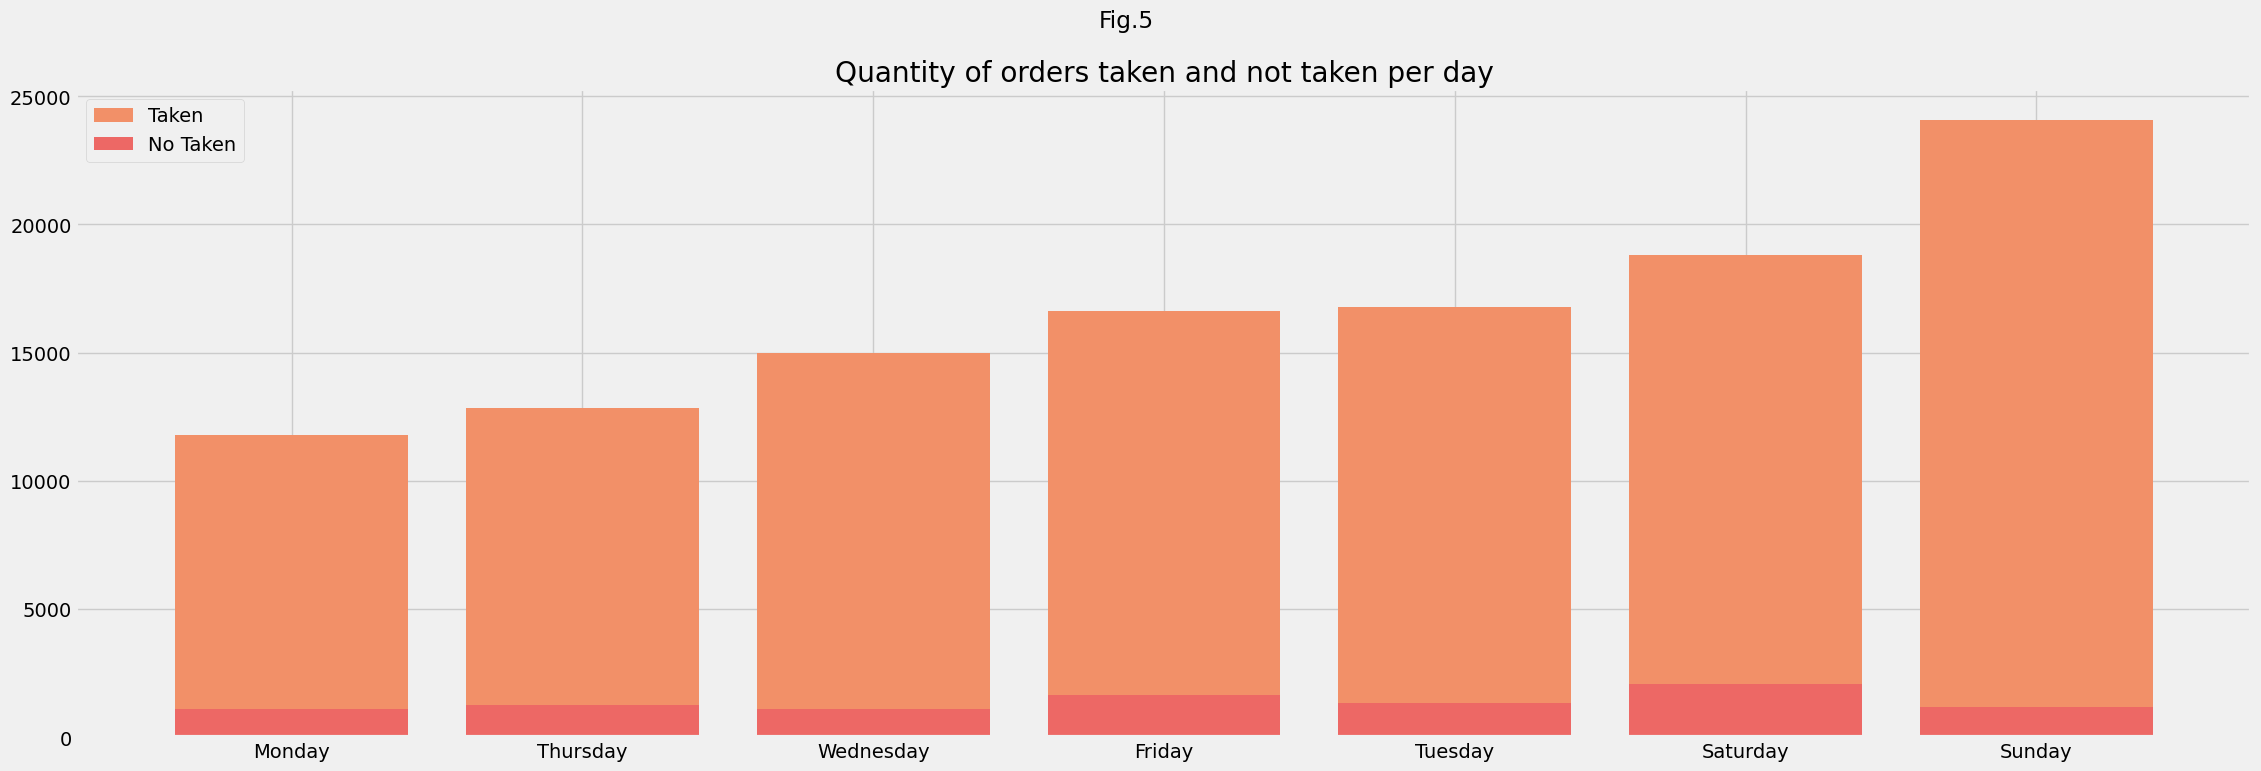

In [ ]:
aw = data_taken.groupby(['WeekDay'])['order_id'].count().sort_values()
bw = data_notaken.groupby(['WeekDay'])['order_id'].count()

plt.figure(figsize=(25,8))
plt.bar(aw.index,aw.values, color="#F29068", label="Taken")
plt.bar(bw.index,bw.values, color="#ED6865", label="No Taken")
plt.title("Quantity of orders taken and not taken per day")
plt.suptitle("Fig.5")
plt.legend()
plt.show()

## Insight N°6

## Fig.6
For the orders that were not taken We have the distribution per day:

*   Monday 9.4%
*   Tuesday 7.8%
*   Wednesday 7.28%
*   Thursday 9.74%
*   Friday  9.80%
*   Saturday 11.12%   
*   Sunday 4.94%

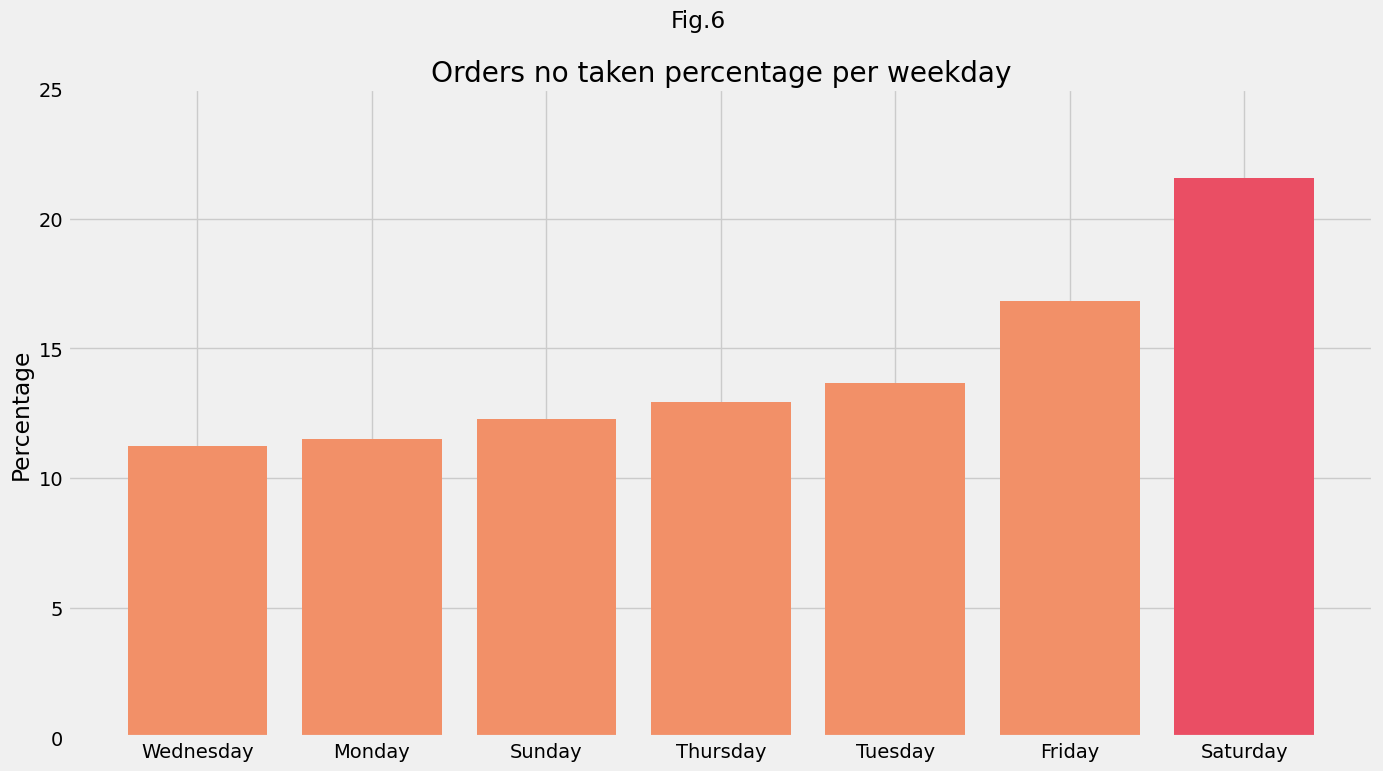

In [ ]:
#Percentage of orders no taken per weekday

dnt = np.round(((data_notaken.groupby(['WeekDay'])["order_id"]
                 .count())
                 .sort_values()/data_notaken.shape[0])*100,2)

colors = ['#F29068','#F29068','#F29068','#F29068','#F29068','#F29068','#EA4E64']
plt.figure(figsize=(15,8))
plt.bar(dnt.index,dnt.values, color=colors)
plt.ylim(0,25)
plt.ylabel("Percentage")
plt.title("Orders no taken percentage per weekday")
plt.suptitle("Fig.6")
plt.show()

## Insight N°7

## Fig.7

In the next chart We can see positive association but moderate between total earning and the distance of the user

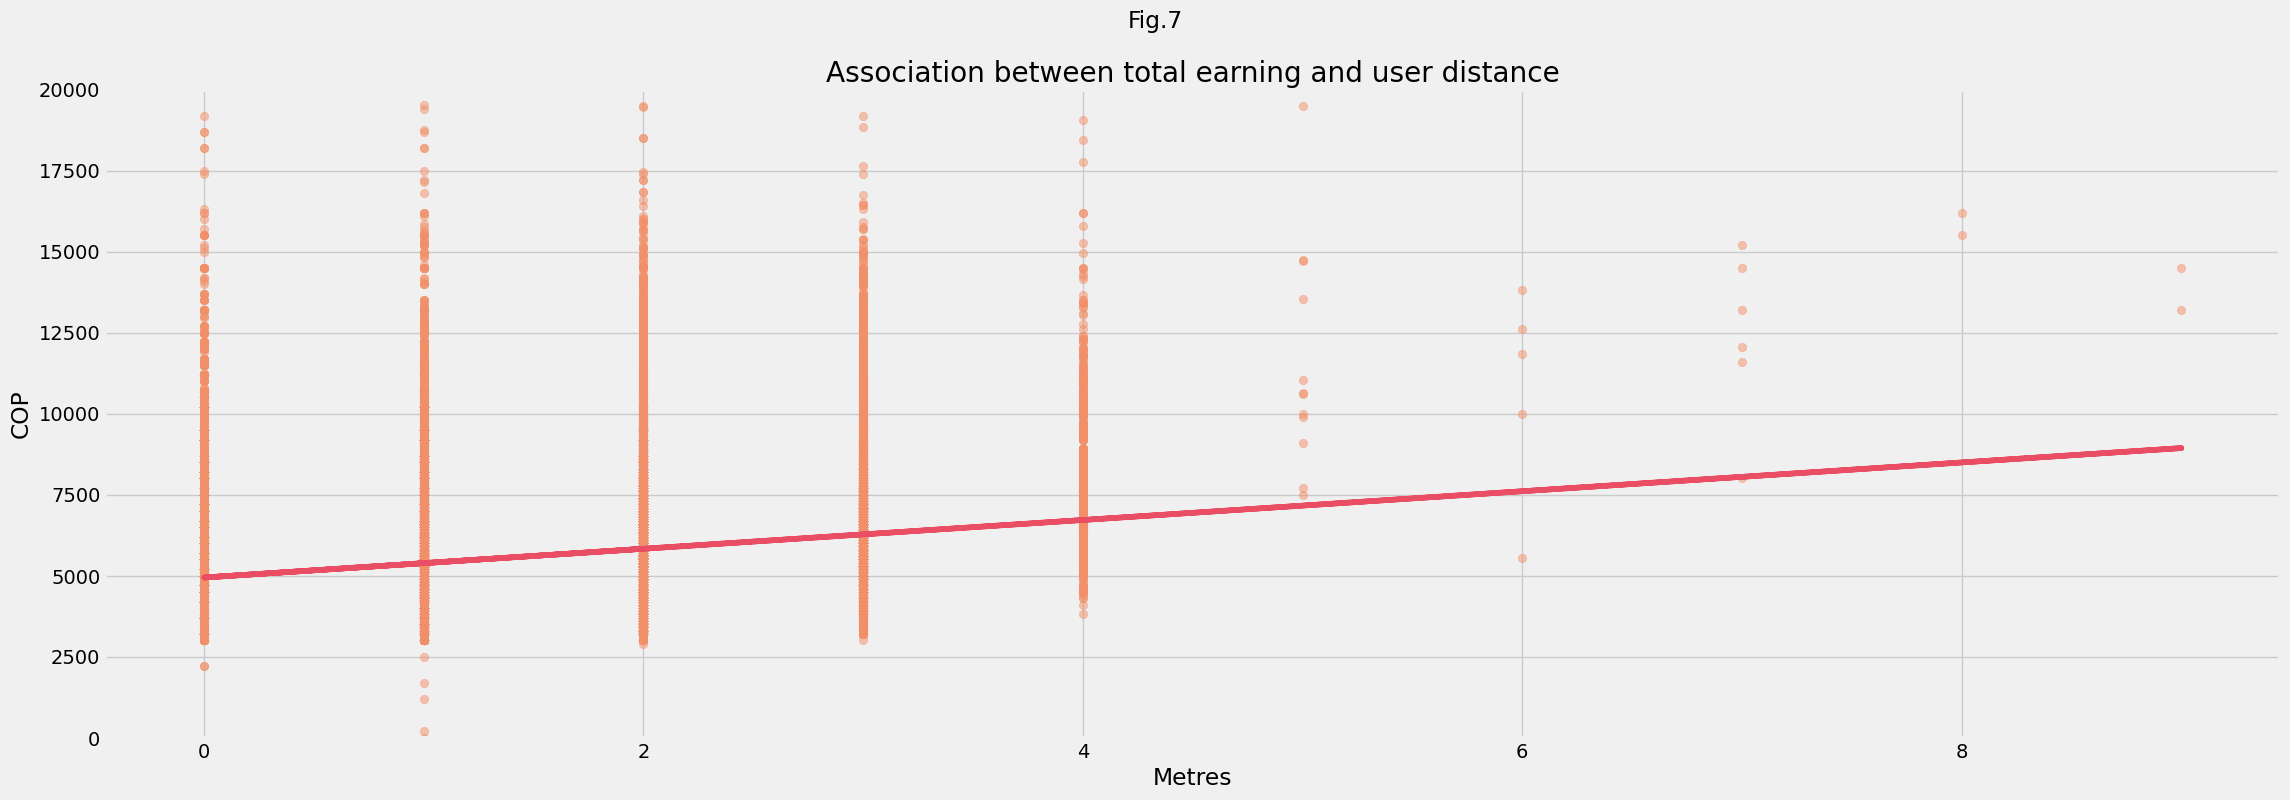

In [ ]:
#Looking for a relation between total earning and user distance
x = data['to_user_distance']
y = data['total_earning']
z = np.polyfit(x,y,1)
p = np.poly1d(z)


plt.figure(figsize=(25,8))
plt.scatter(x,y,color='#F29068',alpha=.5)
plt.plot(x,p(x), color='#EA4E64')
plt.ylim(0,20000)
plt.xlabel("Metres")
plt.ylabel("COP")
plt.title("Association between total earning and user distance")
plt.suptitle("Fig.7")
plt.show()

## Insight N°8

## Fig.8

And last but not the least We can see positive association but weak between total earning and the user elevation

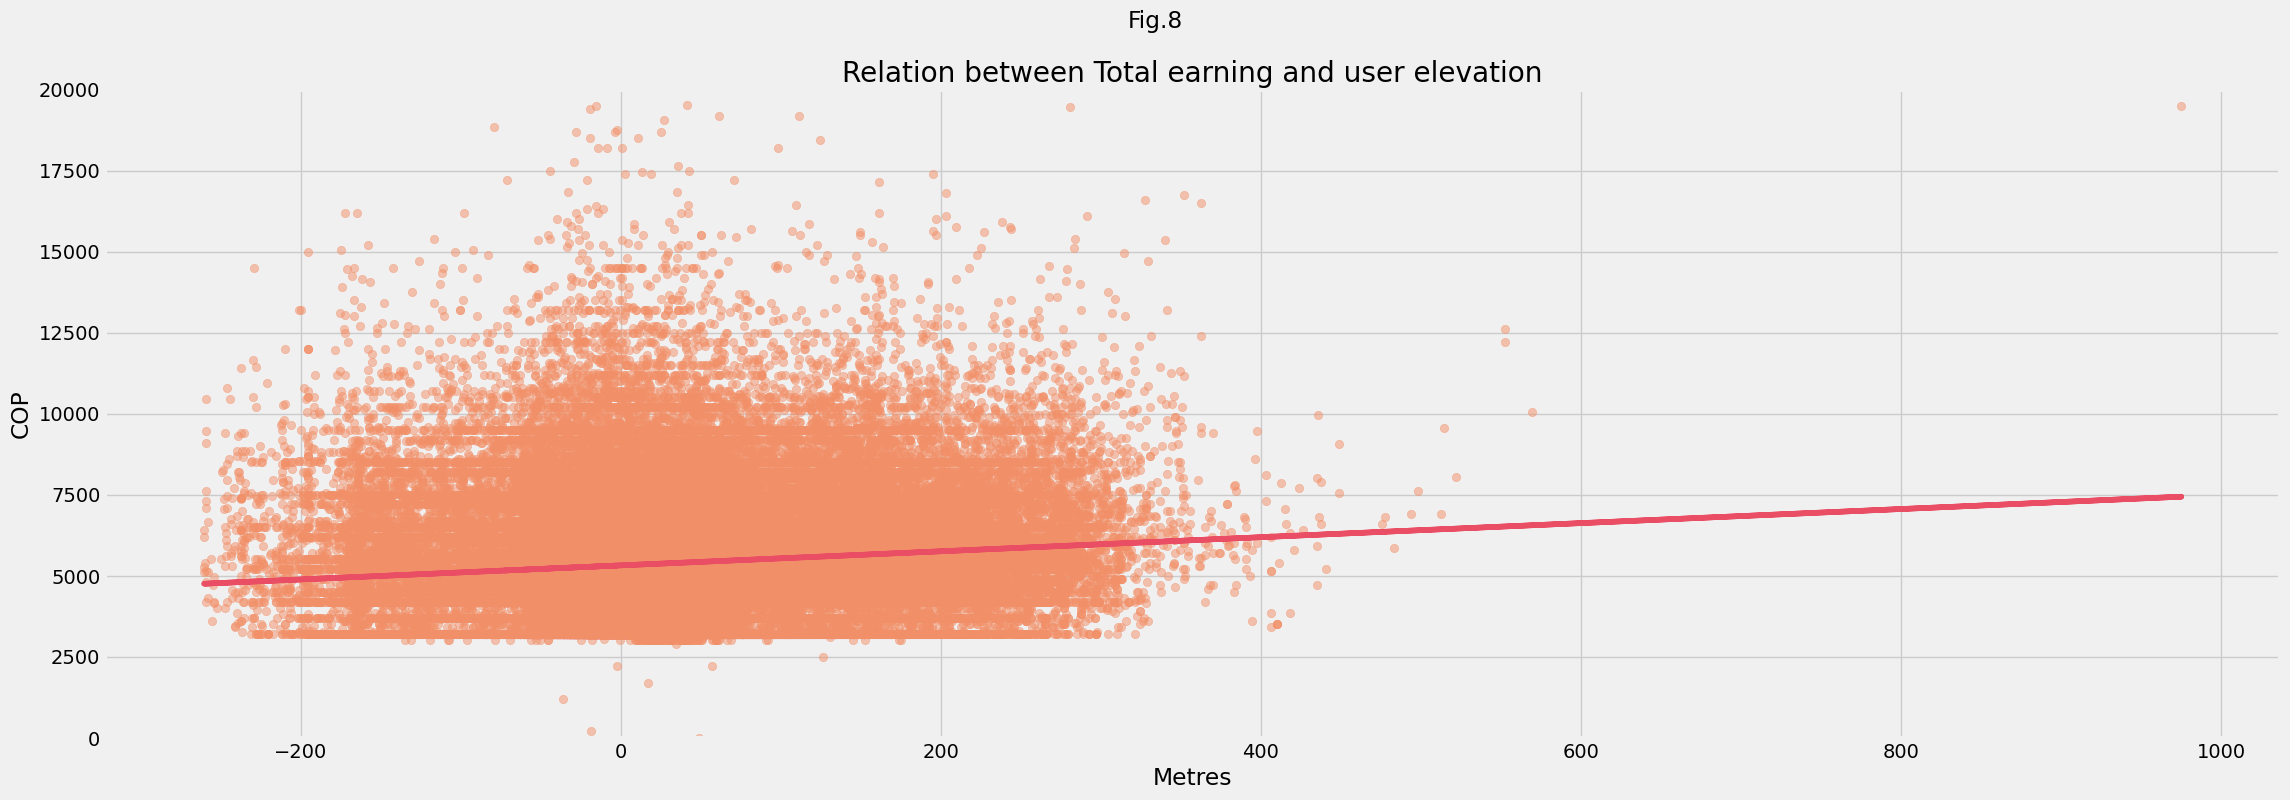

In [ ]:
#Looking for a relation between total earning and user elevation

x = data['to_user_elevation']
y = data['total_earning']
z = np.polyfit(x,y,1)
p = np.poly1d(z)


plt.figure(figsize=(25,8))
plt.scatter(x,y,color='#F29068',alpha=.5)
plt.plot(x,p(x), color='#EA4E64')
plt.ylim(0,20000)
plt.xlabel("Metres")
plt.ylabel("COP")
plt.title("Relation between Total earning and user elevation")
plt.suptitle("Fig.8")
plt.show()

# 2.2 Model